## Practical Work 2

For this practical work, the trainees will have to develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.
##### Please notice that we will apply these algorithm to single variable LR.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

To have a dataset or set of data points, the trainee must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -2, b = 1)</b>


In [2]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [3]:
X.shape

(50,)

In [4]:
a=-2
b=1
y=a*X+b
y

array([  1.        ,   0.18367347,  -0.63265306,  -1.44897959,
        -2.26530612,  -3.08163265,  -3.89795918,  -4.71428571,
        -5.53061224,  -6.34693878,  -7.16326531,  -7.97959184,
        -8.79591837,  -9.6122449 , -10.42857143, -11.24489796,
       -12.06122449, -12.87755102, -13.69387755, -14.51020408,
       -15.32653061, -16.14285714, -16.95918367, -17.7755102 ,
       -18.59183673, -19.40816327, -20.2244898 , -21.04081633,
       -21.85714286, -22.67346939, -23.48979592, -24.30612245,
       -25.12244898, -25.93877551, -26.75510204, -27.57142857,
       -28.3877551 , -29.20408163, -30.02040816, -30.83673469,
       -31.65306122, -32.46938776, -33.28571429, -34.10204082,
       -34.91836735, -35.73469388, -36.55102041, -37.36734694,
       -38.18367347, -39.        ])

### Plot X vs. y

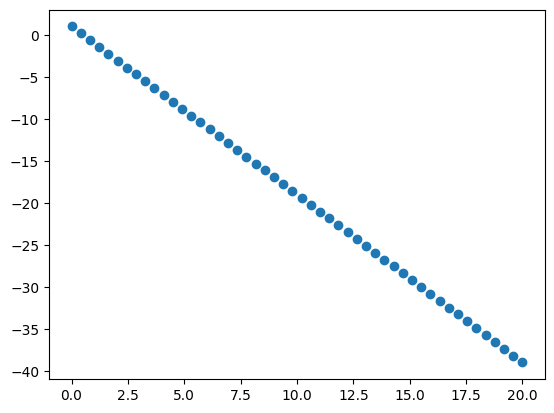

In [5]:
plt.scatter(X, y)

#### Use your code from practical session 1 and create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
#### Implement the stop criteria (Gradient Check).
#### Implement the convergence check (cost check).
#### You can use any small values for stop criteria and convergence check. However, the used values in the current implementation used 0.001 for both.

In [6]:
def gradientDescent(X, y, alpha, maxNumIters):

    gradient_check = 0.001
    cost_check = 0.001
    theta_0 = 0
    theta_1 = 0
    
    thetas_0_list = []
    thetas_1_list = []
    cost = []
    hypothesis = []
    for i in range(maxNumIters):
        print(f'****************** Iteration {i} ********************')
        print()

        m = len(X)

        thetas_0_list.append(theta_0)
        thetas_1_list.append(theta_1)

        # 2- Prediction
        h = theta_0 + theta_1 * X
        hypothesis.append(h)

        # 3- Evaluate Prediction (Calculate loss/cost function)
        error = h - y

        # j = np.sum(error**2) / (2*m) # --> Normal equation
        # j = np.linalg.norm(error)**2 / (2*m) # --> By vector Norm
        mse = error @ error / (2*m) # --> By dot product

        j = np.sum(mse)
        cost.append(j)

        # 4- Get gradient
        d_theta_0 = np.sum(error) / m
        d_theta_1 = np.sum(error*X) / m

        d_theta = np.array([[d_theta_0],
                            [d_theta_1]])
        
        d_theta_norm = np.linalg.norm(d_theta)

        # 5- Update parameters
        theta_0 = theta_0 - alpha * d_theta_0
        theta_1 = theta_1 - alpha * d_theta_1

        print('h(x):', h)
        print()
        
        print('Error Vector:\n', error)
        print()
        
        print('j = ', j)
        print()

        print('Gradient Vector:\n', d_theta)
        print()
        
        print('Gradient Vector Norm:\n', d_theta_norm)
        print()

        if i > 0:
            if d_theta_norm <= gradient_check or abs(cost[-2] - cost[-1]) <= cost_check:
                break
        
        print('theta_0_new', theta_0)
        print('theta_1_new', theta_1)
        print()


    print('****************** Training Report ********************')
    print()

    print(f'Gradient Descent converged after {i+1} iterations')
    print()

    print('theta_0_Opt : ', theta_0)
    print('theta_1_Opt : ', theta_1)
    print()

    print('Error Vector:\n', error)
    print()

    print('Cost = ', j)
    print()

    print('h(x) = y_predict:\n', h)
    print()

    print('y_actual:\n', y)

    return thetas_0_list, thetas_1_list, cost, hypothesis, thetas_0_list[-1], thetas_1_list[-1]

#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005 and max. iterations = 300.

In [7]:
alpha = 0.0005
iterations = 300
thetas_0_list, thetas_1_list, cost, hypothesis, theta_0_opt, theta_1_opt = gradientDescent(X, y, alpha, iterations)

****************** Iteration 0 ********************

h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
 [-1.         -0.18367347  0.63265306  1.44897959  2.26530612  3.08163265
  3.89795918  4.71428571  5.53061224  6.34693878  7.16326531  7.97959184
  8.79591837  9.6122449  10.42857143 11.24489796 12.06122449 12.87755102
 13.69387755 14.51020408 15.32653061 16.14285714 16.95918367 17.7755102
 18.59183673 19.40816327 20.2244898  21.04081633 21.85714286 22.67346939
 23.48979592 24.30612245 25.12244898 25.93877551 26.75510204 27.57142857
 28.3877551  29.20408163 30.02040816 30.83673469 31.65306122 32.46938776
 33.28571429 34.10204082 34.91836735 35.73469388 36.55102041 37.36734694
 38.18367347 39.        ]

j =  249.88775510204087

Gradient Vector:
 [[ 19.       ]
 [259.3877551]]

Gradient Vector Norm:
 260.08269357432516

theta_0_new -0.0095
theta_1_new -0.12969387

#### Calculate r2 score

In [8]:
h = theta_0_opt + theta_1_opt * X

In [9]:
from sklearn.metrics import r2_score

r2_score(y, h)

0.9975395965150151

##### It is recommended to define a function for each plot. This will help you to easly plot the learning curves when you use different values of hyperparameters.

#### Plot loss vs. epochs

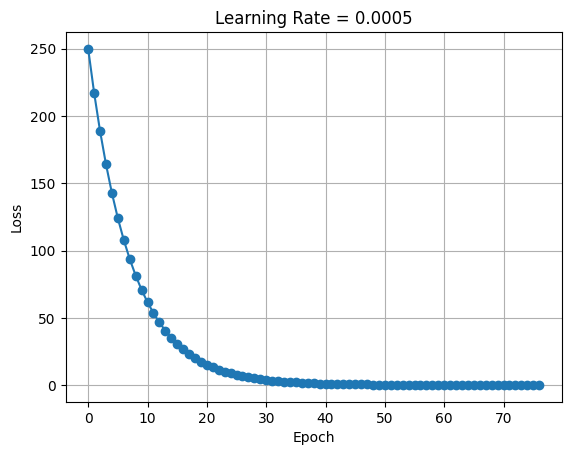

In [10]:
def plot_loss_epoch(loss, alpha):
    plt.plot(loss, marker='o')
    plt.title(f'Learning Rate = {alpha}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid()
    plt.show()

plot_loss_epoch(cost, alpha)

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

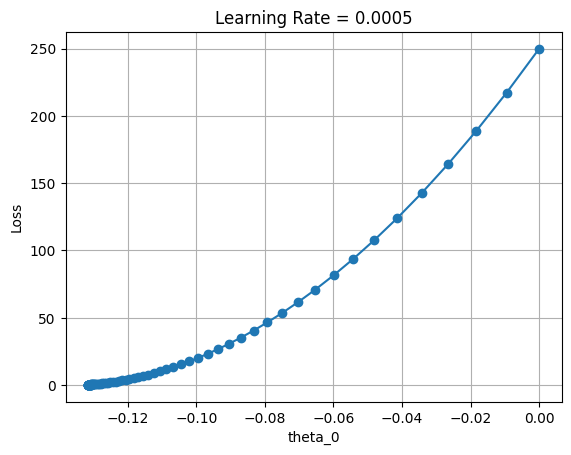

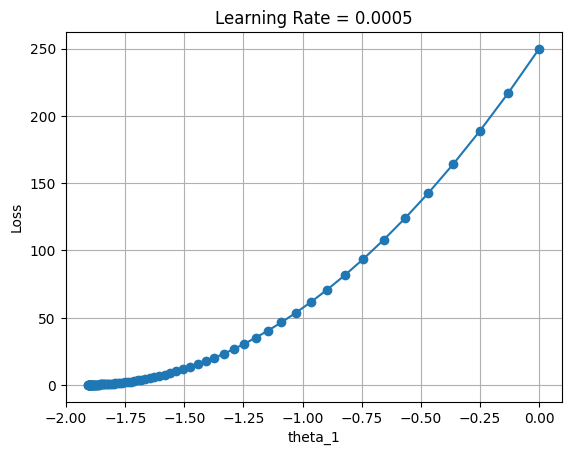

In [11]:
def plot_theta_loss(theta, loss, alpha, xlabel):
    plt.plot(theta, loss, marker='o')
    plt.title(f'Learning Rate = {alpha}')
    plt.xlabel(xlabel)
    plt.ylabel('Loss')
    plt.grid()
    plt.show()

plot_theta_loss(thetas_0_list, cost, alpha, xlabel='theta_0')
plot_theta_loss(thetas_1_list, cost, alpha, xlabel='theta_1')

#### Plot all regression lines till converge

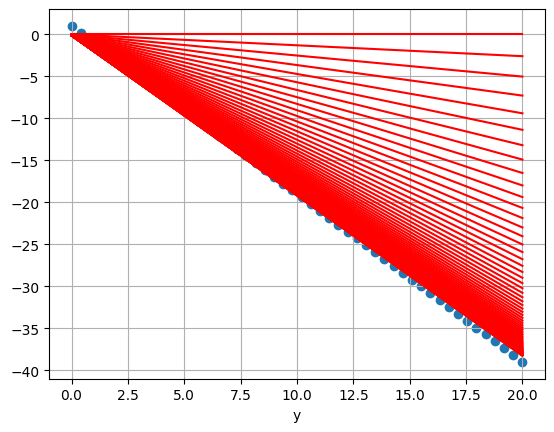

In [12]:
def plot_lines(X, y, hypothesis):
    for h in hypothesis:
        plt.plot(X, h, color='r')
    
    plt.scatter(X, y)
    plt.xlabel('X')
    plt.xlabel('y')
    plt.grid()
    plt.show()

plot_lines(X, y, hypothesis)

#### Plot the best regression line

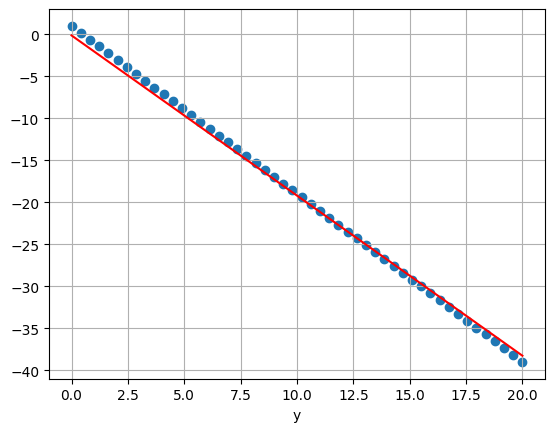

In [13]:
def plot_best_line(X, y, h):
    plt.plot(X, h, color='r')
    
    plt.scatter(X, y)
    plt.xlabel('X')
    plt.xlabel('y')
    plt.grid()
    plt.show()

plot_best_line(X, y, hypothesis[-1])

#### Try different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and see the difference in output.

##### The following results uses alpha = 0.00005 and max. iterations = 1000.

In [14]:
alpha = 0.00005
iterations = 1000
thetas_0_list, thetas_1_list, cost, hypothesis, theta_0_opt, theta_1_opt = gradientDescent(X, y, alpha, iterations)

****************** Iteration 0 ********************

h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
 [-1.         -0.18367347  0.63265306  1.44897959  2.26530612  3.08163265
  3.89795918  4.71428571  5.53061224  6.34693878  7.16326531  7.97959184
  8.79591837  9.6122449  10.42857143 11.24489796 12.06122449 12.87755102
 13.69387755 14.51020408 15.32653061 16.14285714 16.95918367 17.7755102
 18.59183673 19.40816327 20.2244898  21.04081633 21.85714286 22.67346939
 23.48979592 24.30612245 25.12244898 25.93877551 26.75510204 27.57142857
 28.3877551  29.20408163 30.02040816 30.83673469 31.65306122 32.46938776
 33.28571429 34.10204082 34.91836735 35.73469388 36.55102041 37.36734694
 38.18367347 39.        ]

j =  249.88775510204087

Gradient Vector:
 [[ 19.       ]
 [259.3877551]]

Gradient Vector Norm:
 260.08269357432516

theta_0_new -0.00095
theta_1_new -0.0129693

In [15]:
h = theta_0_opt + theta_1_opt * X

print('r2_score:', r2_score(y, h))

r2_score: 0.9965793400861428


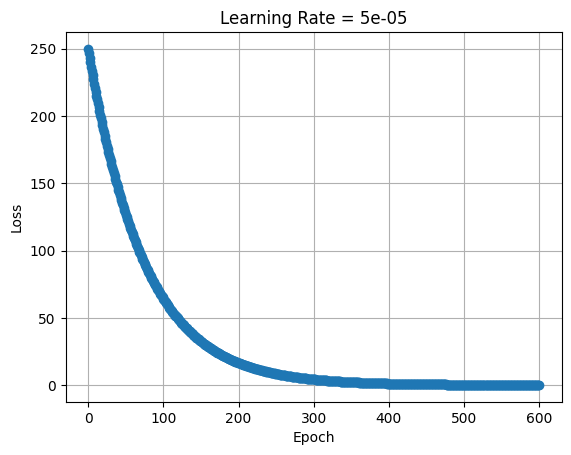

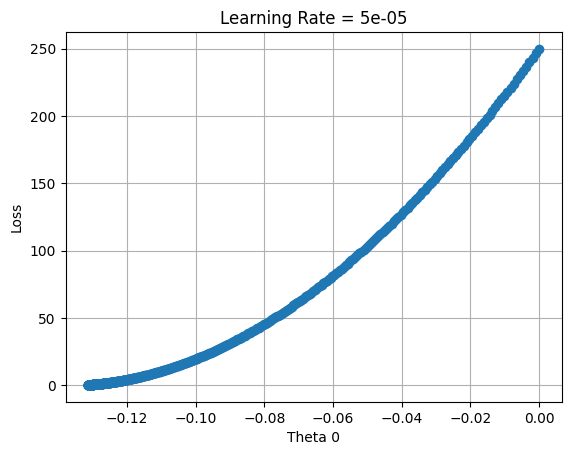

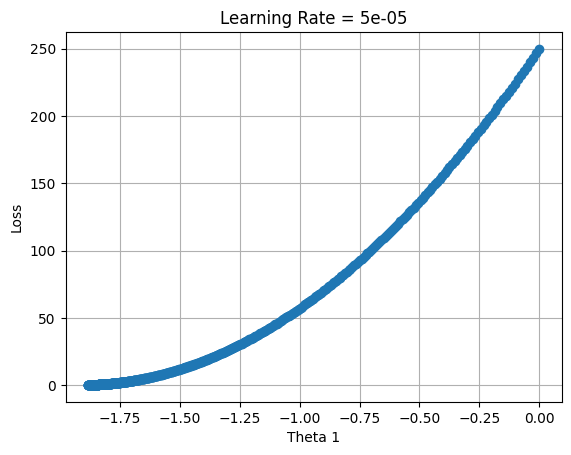

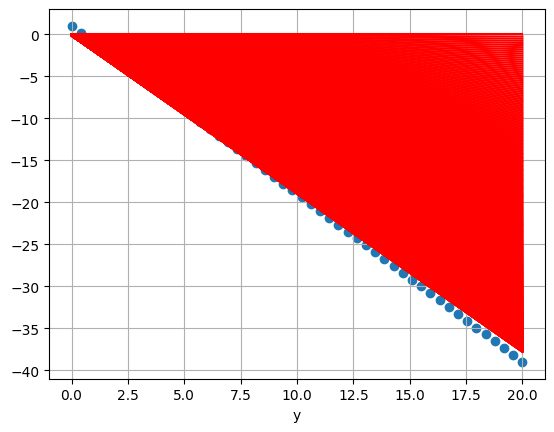

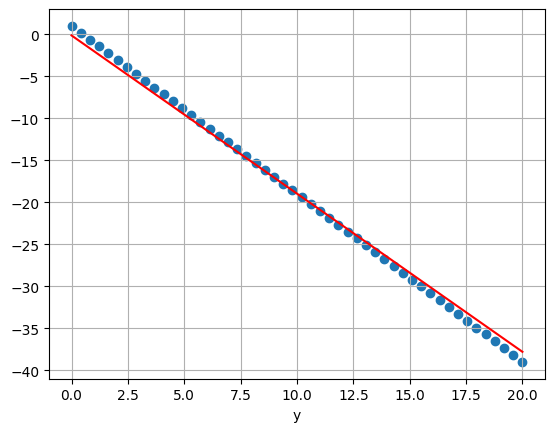

In [16]:
plot_loss_epoch(cost, alpha)
plot_theta_loss(thetas_0_list, cost, alpha, xlabel='Theta 0')
plot_theta_loss(thetas_1_list, cost, alpha, xlabel='Theta 1')
plot_lines(X, y, hypothesis)
plot_best_line(X, y, hypothesis[-1])

##### The following results uses alpha = 0.005 and max. iterations = 300.

In [17]:
alpha = 0.005
iterations = 300
thetas_0_list, thetas_1_list, cost, hypothesis, theta_0_opt, theta_1_opt = gradientDescent(X, y, alpha, iterations)

****************** Iteration 0 ********************

h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
 [-1.         -0.18367347  0.63265306  1.44897959  2.26530612  3.08163265
  3.89795918  4.71428571  5.53061224  6.34693878  7.16326531  7.97959184
  8.79591837  9.6122449  10.42857143 11.24489796 12.06122449 12.87755102
 13.69387755 14.51020408 15.32653061 16.14285714 16.95918367 17.7755102
 18.59183673 19.40816327 20.2244898  21.04081633 21.85714286 22.67346939
 23.48979592 24.30612245 25.12244898 25.93877551 26.75510204 27.57142857
 28.3877551  29.20408163 30.02040816 30.83673469 31.65306122 32.46938776
 33.28571429 34.10204082 34.91836735 35.73469388 36.55102041 37.36734694
 38.18367347 39.        ]

j =  249.88775510204087

Gradient Vector:
 [[ 19.       ]
 [259.3877551]]

Gradient Vector Norm:
 260.08269357432516

theta_0_new -0.095
theta_1_new -1.296938775

In [18]:
h = theta_0_opt + theta_1_opt * X

print('r2_score:', r2_score(y, h))

r2_score: 0.9976200723230484


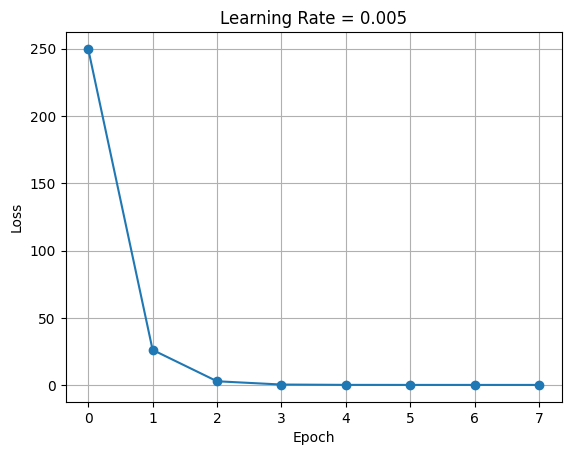

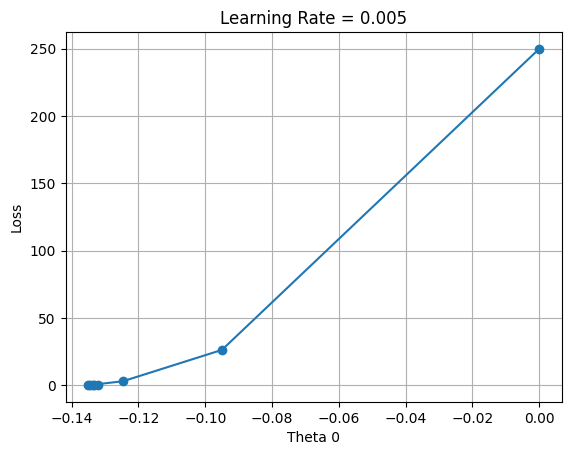

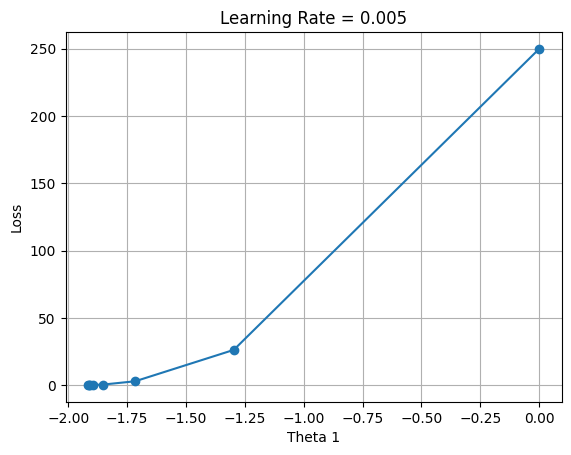

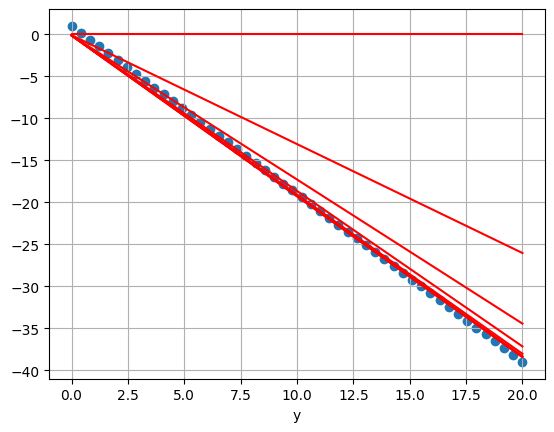

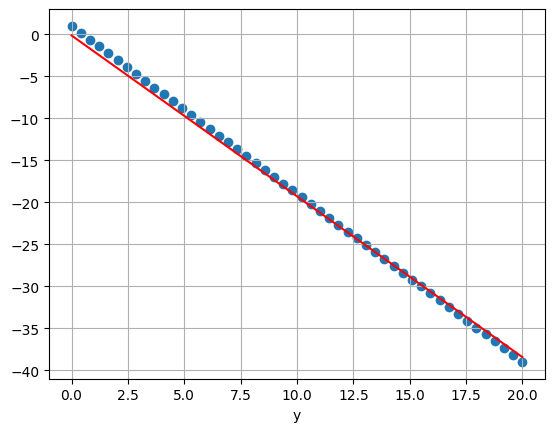

In [19]:
plot_loss_epoch(cost, alpha)
plot_theta_loss(thetas_0_list, cost, alpha, xlabel='Theta 0')
plot_theta_loss(thetas_1_list, cost, alpha, xlabel='Theta 1')
plot_lines(X, y, hypothesis)
plot_best_line(X, y, hypothesis[-1])

## Stochastic GD

#### Update the implementation of the Batch GD to be Stochastic and rpeat the above plots and evaluations
#### You can try different learning rate and see its effect.
#### Compare to the Batch GD.
#### Do not forget to shuffle the data.

##### Very Important notes:
- <font color='red'>Save your losses and thetas for each iterations (not each epoch).</font>
- <font color='red'>Plot loss vs. iterations (not epochs). This will allow you to see the difference between SGD (stochastic GD) and batch GD.</font>
- <font color='red'>Convergence check should be performed each epoch not each iterations. This allows you to perform more accurate decision. This is because the noisy process could lead to a deciving decision.</font>
- <font color='red'>Your result may be different from the results shown below due to the randomness of the process. As well as, the random shuffle. The results will be different also for two different run of the algorithm.</font>


In [20]:
def shuffle_data(X, y):
    m = len(X)
    X = X.reshape(m, 1)
    y = y.reshape(m, 1)

    data = np.concatenate((X, y), axis=1)
    np.random.shuffle(data)

    X = data[:, 0]
    y = data[:, 1]

    return X, y

In [21]:
def SGD(X, y, alpha, epochs):

    X, y = shuffle_data(X, y)
    
    gradient_check = 0.001
    cost_check = 0.001
    theta_0 = 0
    theta_1 = 0
    
    thetas_0_list = []
    thetas_1_list = []
    cost = []
    cost_per_epoch = []
    hypothesis = []

    for epoch in range(epochs):
        print(f'****************** Epoch {epoch} ********************')
        print()
        
        for i in range(len(X)):

            thetas_0_list.append(theta_0)
            thetas_1_list.append(theta_1)

            # 2- Prediction
            h = theta_0 + theta_1 * X[i]
            hypothesis.append(h)

            # 3- Evaluate Prediction (Calculate loss/cost function)
            error = h - y[i]
            j = error**2 / 2   # Normal Equation
            cost.append(j)

            # 4- Get gradient
            d_theta_0 = error
            d_theta_1 = error * X[i]

            # 5- Update parameters
            theta_0 = theta_0 - alpha*d_theta_0
            theta_1 = theta_1 - alpha*d_theta_1

        
        d_theta = np.array([[d_theta_0],
                            [d_theta_1]])

        d_theta_norm = np.linalg.norm(d_theta)
        
        cost_per_epoch.append(j)
        print('Cost = ', j)
        print()

        print('Gradient Vector:\n', d_theta)
        print()
        
        print('Gradient Vector Norm:\n', d_theta_norm)
        print()

        print('theta_0_new : ', theta_0)
        print('theta_0_new : ', theta_1)
        print()
        
        if epoch > 0:
            if d_theta_norm <= gradient_check or abs(cost_per_epoch[-1] - cost_per_epoch[-2]) <= cost_check:
                break
    
    print('****************** Training Report ********************')
    print()

    print(f'Gradient Descent converged after {epoch+1} epochs')
    print()
    
    print('theta_0_opt : ', theta_0)
    print('theta_0_opt : ', theta_1)
    print()

    print('Cost = ', j)
    print()
    
    return thetas_0_list, thetas_1_list, cost, hypothesis, thetas_0_list[-1], thetas_1_list[-1]


##### The following results uses alpha = 0.0005 and max. iterations = 300.

In [22]:
alpha = 0.0005
epochs = 300

thetas_0_list_st, thetas_1_list_st, cost_st, hypothesis_st, theta_0_opt_st, theta_1_opt_st = SGD(X, y, alpha, epochs)

****************** Epoch 0 ********************

Cost =  0.07900849491331764

Gradient Vector:
 [[0.39751351]
 [4.21851071]]

Gradient Vector Norm:
 4.237198317290363

theta_0_new :  -0.12414398879719031
theta_0_new :  -1.8587410278337608

****************** Epoch 1 ********************

Cost =  0.013915334789309773

Gradient Vector:
 [[-0.16682527]
 [-1.77039058]]

Gradient Vector Norm:
 1.7782332498655868

theta_0_new :  -0.12040604084505321
theta_0_new :  -1.9092502947911083

****************** Epoch 2 ********************

Cost =  0.016352445638147813

Gradient Vector:
 [[-0.18084494]
 [-1.91917076]]

Gradient Vector Norm:
 1.9276725088997821

theta_0_new :  -0.11327745935591056
theta_0_new :  -1.9111680602131327

****************** Epoch 3 ********************

Cost =  0.01621525035991795

Gradient Vector:
 [[-0.1800847 ]
 [-1.91110298]]

Gradient Vector Norm:
 1.9195689926120738

theta_0_new :  -0.10610307827082471
theta_0_new :  -1.9117765400458562

****************** Training R

In [23]:
h_SGD = theta_0_opt_st + theta_1_opt_st * X

print('r2_score:', r2_score(y, h_SGD))

r2_score: 0.9977031498844158


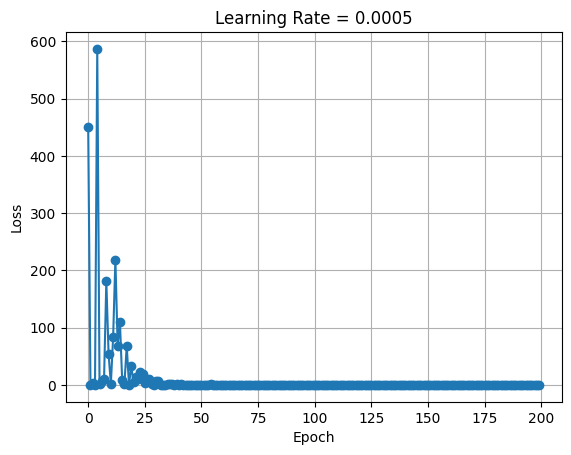

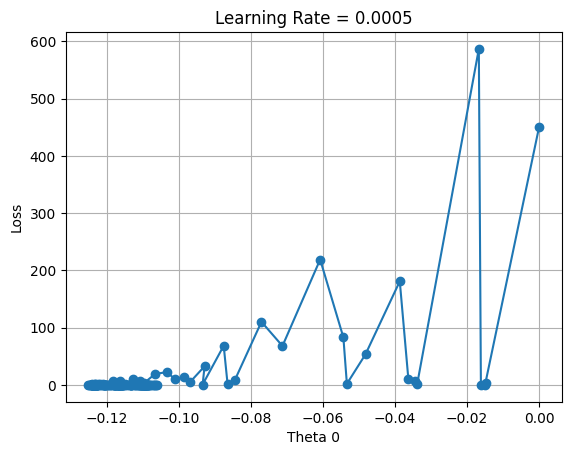

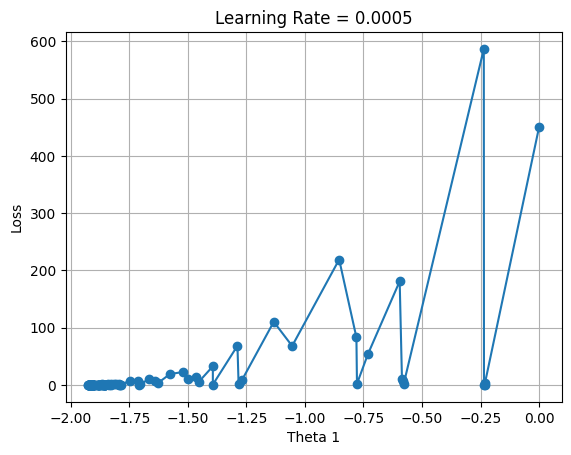

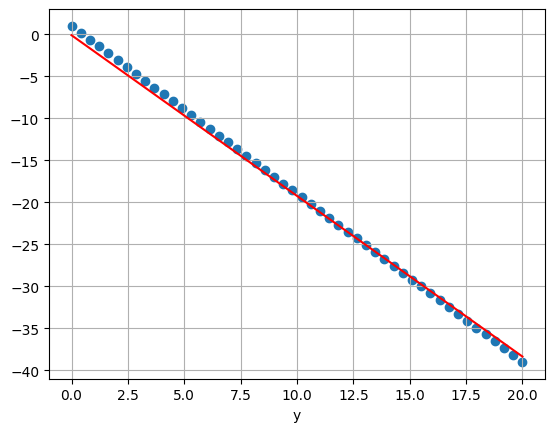

In [24]:
plot_loss_epoch(cost_st, alpha)
plot_theta_loss(thetas_0_list_st, cost_st, alpha, xlabel='Theta 0')
plot_theta_loss(thetas_1_list_st, cost_st, alpha, xlabel='Theta 1')
plot_best_line(X, y, theta_0_opt_st + theta_1_opt_st * X)

##### The following results uses alpha = 0.0001 and max. iterations = 300.

In [25]:
alpha = 0.0001
epochs = 300

thetas_0_list_st, thetas_1_list_st, cost_st, hypothesis_st, theta_0_opt_st, theta_1_opt_st = SGD(X, y, alpha, epochs)

****************** Epoch 0 ********************

Cost =  31.86496749881183

Gradient Vector:
 [[ 7.98310309]
 [68.42659794]]

Gradient Vector Norm:
 68.89070504027

theta_0_new :  -0.06963301146773047
theta_0_new :  -0.9507832504453634

****************** Epoch 1 ********************

Cost =  7.26505585681895

Gradient Vector:
 [[ 3.81183836]
 [32.67290026]]

Gradient Vector Norm:
 32.89450597482581

theta_0_new :  -0.10398490423687681
theta_0_new :  -1.4297990468405235

****************** Epoch 2 ********************

Cost =  1.4634353194850696

Gradient Vector:
 [[ 1.71080994]
 [14.66408517]]

Gradient Vector Norm:
 14.76354512041368

theta_0_new :  -0.12056467156224411
theta_0_new :  -1.6711593303541576

****************** Epoch 3 ********************

Cost =  0.2129917162370102

Gradient Vector:
 [[0.65267406]
 [5.59434911]]

Gradient Vector Norm:
 5.632293086315479

theta_0_new :  -0.12819256369617335
theta_0_new :  -1.7927992763307756

****************** Epoch 4 *****************

In [26]:
h_SGD = theta_0_opt_st + theta_1_opt_st * X

print('r2_score:', r2_score(y, h_SGD))

r2_score: 0.9976530529393146


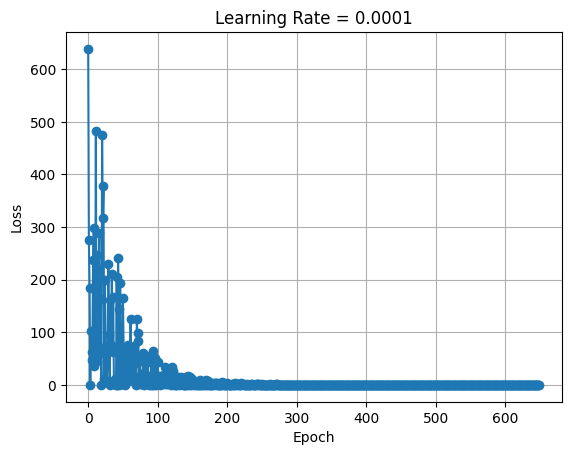

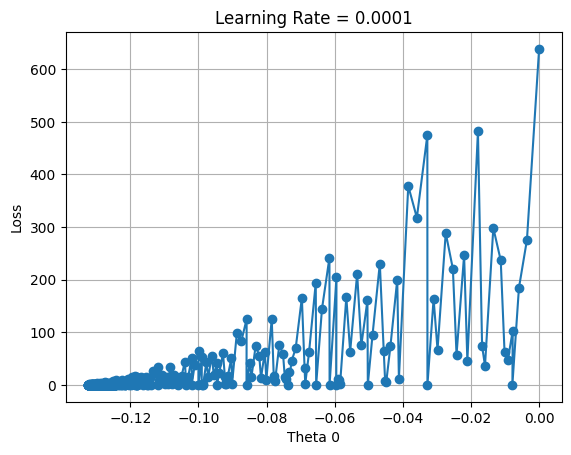

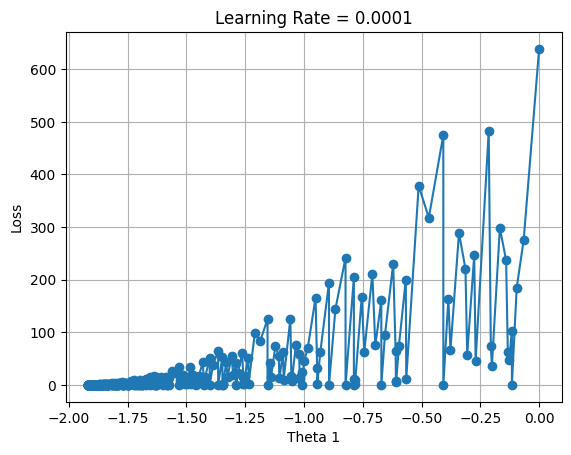

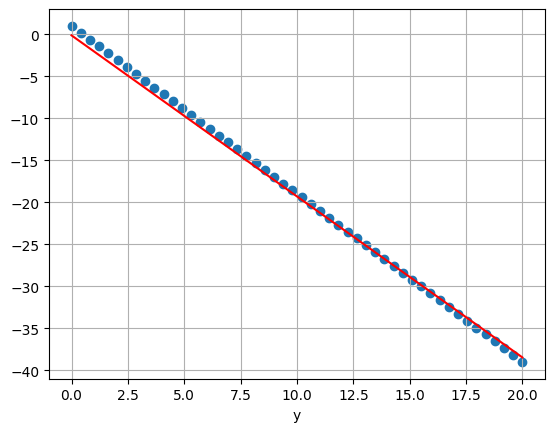

In [27]:
plot_loss_epoch(cost_st, alpha)
plot_theta_loss(thetas_0_list_st, cost_st, alpha, xlabel='Theta 0')
plot_theta_loss(thetas_1_list_st, cost_st, alpha, xlabel='Theta 1')
plot_best_line(X, y, theta_0_opt_st + theta_1_opt_st * X)

##### The following results uses alpha = 0.00007 and max. iterations = 300.

In [28]:
alpha = 0.00007
epochs = 300

thetas_0_list_st, thetas_1_list_st, cost_st, hypothesis_st, theta_0_opt_st, theta_1_opt_st = SGD(X, y, alpha, epochs)

****************** Epoch 0 ********************

Cost =  300.79579790743776

Gradient Vector:
 [[ 24.52736422]
 [480.53611542]]

Gradient Vector Norm:
 481.1616670338559

theta_0_new :  -0.05322163881834099
theta_0_new :  -0.7280494255204386

****************** Epoch 1 ********************

Cost =  118.6725064741424

Gradient Vector:
 [[ 15.40600574]
 [301.83194925]]

Gradient Vector Norm:
 302.22486760594103

theta_0_new :  -0.08582595734956856
theta_0_new :  -1.1794127044583826

****************** Epoch 2 ********************

Cost =  47.54379940952733

Gradient Vector:
 [[  9.75128703]
 [191.04562352]]

Gradient Vector Norm:
 191.29432261846674

theta_0_new :  -0.10564947764514947
theta_0_new :  -1.4592518997350628

****************** Epoch 3 ********************

Cost =  19.50386966792867

Gradient Vector:
 [[  6.24561761]
 [122.36312053]]

Gradient Vector Norm:
 122.52241021725045

theta_0_new :  -0.1175502382844009
theta_0_new :  -1.632759374563045

****************** Epoch 4 ***

In [29]:
h_SGD = theta_0_opt_st + theta_1_opt_st * X

print('r2_score:', r2_score(y, h_SGD))

r2_score: 0.9976658156167841


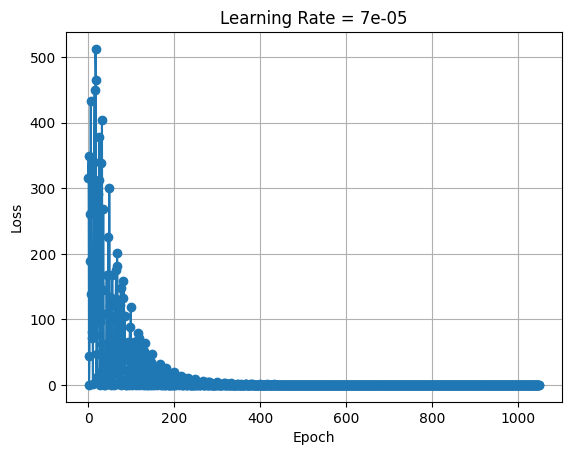

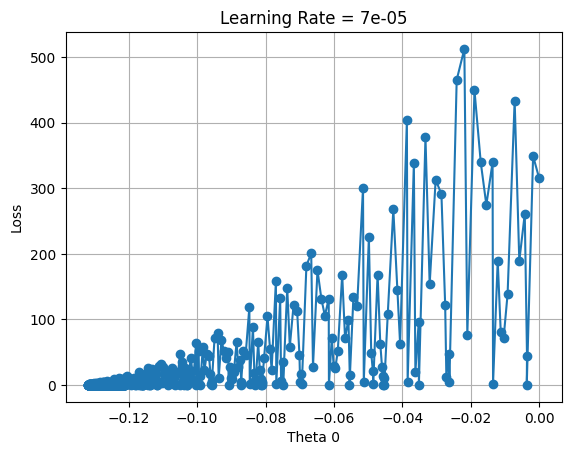

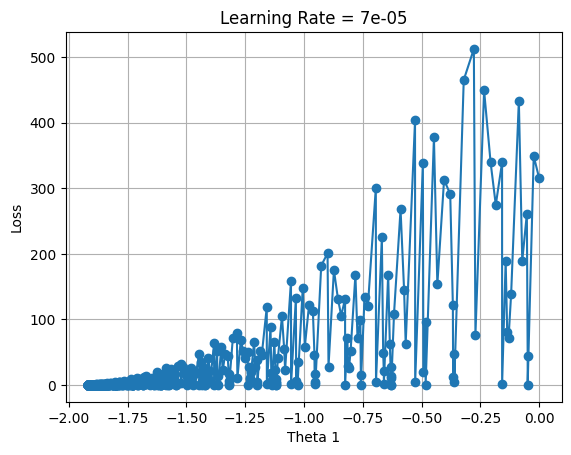

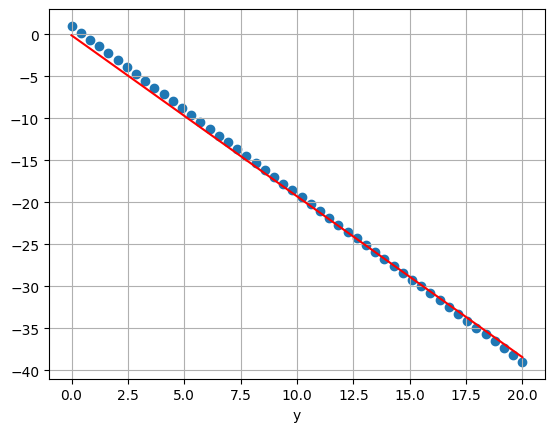

In [30]:
plot_loss_epoch(cost_st, alpha)
plot_theta_loss(thetas_0_list_st, cost_st, alpha, xlabel='Theta 0')
plot_theta_loss(thetas_1_list_st, cost_st, alpha, xlabel='Theta 1')
plot_best_line(X, y, theta_0_opt_st + theta_1_opt_st * X)

## Mini-Batch GD

#### Update the implementation of the Batch GD to be Mini-Batch and repeat the above plots and evaluations
#### Change batch size and see the effect
#### Do not forget to shuffle the data

##### Very Important notes:
- <font color='red'>Save your losses and thetas for each iterations (not each epoch).</font>
- <font color='red'>Plot loss vs. iterations (not epochs). This will allow you to see the difference between SGD (stochastic GD) and batch GD.</font>
- <font color='red'>Convergence check should be performed each epoch not each iterations. This allows you to perform more accurate decision. This is because the noisy process could lead to a deciving decision.</font>
-<font color='red'>Your result may be different from the results shown below due to the randomness of the process. As well as, the random shuffle. The results will be different also for two different run of the algorithm.</font>

In [31]:
def mini_batch_GD(X, y, alpha, batch_size, epochs):

    X, y = shuffle_data(X, y)
    
    gradient_check = 0.001
    cost_check = 0.001
    theta_0 = 0
    theta_1 = 0
    
    thetas_0_list = []
    thetas_1_list = []
    cost = []
    cost_per_epoch = []
    hypothesis = []

    for epoch in range(epochs):
        print(f'****************** Epoch {epoch} ********************')
        print()
        
        for i in range(len(X) // batch_size):

            thetas_0_list.append(theta_0)
            thetas_1_list.append(theta_1)

            # 2- Prediction
            start = i * batch_size
            end = i * batch_size + batch_size

            h = theta_0 + theta_1 * X[start:end]
            hypothesis.append(h)

            # 3- Evaluate Prediction (Calculate loss/cost function)
            error = h - y[start:end]
            mse = error @ error / (2*batch_size)
            j = np.sum(mse)
            cost.append(j)

            # 4- Get gradient
            d_theta_0 = np.sum(error) / batch_size
            d_theta_1 = np.sum(error * X[start:end]) / batch_size

            # 5- Update parameters
            theta_0 = theta_0 - alpha*d_theta_0
            theta_1 = theta_1 - alpha*d_theta_1

        
        d_theta = np.array([[d_theta_0],
                            [d_theta_1]])

        d_theta_norm = np.linalg.norm(d_theta)
        
        cost_per_epoch.append(j)
        print('Cost = ', j)
        print()

        print('Gradient Vector:\n', d_theta)
        print()
        
        print('Gradient Vector Norm:\n', d_theta_norm)
        print()

        print('theta_0_new : ', theta_0)
        print('theta_0_new : ', theta_1)
        print()
        
        if epoch > 0:
            if d_theta_norm <= gradient_check or abs(cost_per_epoch[-1] - cost_per_epoch[-2]) <= cost_check:
                break
    
    print('****************** Training Report ********************')
    print()

    print(f'Gradient Descent converged after {epoch+1} epochs')
    print()
    
    print('theta_0_opt : ', theta_0)
    print('theta_0_opt : ', theta_1)
    print()

    print('Cost = ', j)
    print()
    
    return thetas_0_list, thetas_1_list, cost, hypothesis, thetas_0_list[-1], thetas_1_list[-1]


##### The following results uses batch size=5, alpha = 0.0005 and max. iterations = 300.

In [32]:
batch_size = 5
alpha = 0.0005
epochs = 300

thetas_0_list_mini, thetas_1_list_mini, cost_mini, hypothesis_mini, theta_0_opt_mini, theta_1_opt_mini = mini_batch_GD(X, y, alpha, batch_size, epochs)

****************** Epoch 0 ********************

Cost =  97.62462715110229

Gradient Vector:
 [[ 12.69800761]
 [185.74497648]]

Gradient Vector Norm:
 186.17850489066774

theta_0_new :  -0.07102037269891912
theta_0_new :  -0.968920371705269

****************** Epoch 1 ********************

Cost =  24.180128192579076

Gradient Vector:
 [[ 6.22297593]
 [92.30529209]]

Gradient Vector Norm:
 92.51482247253954

theta_0_new :  -0.10538699459916909
theta_0_new :  -1.447923778764948

****************** Epoch 2 ********************

Cost =  6.107929650806121

Gradient Vector:
 [[ 3.02235911]
 [46.11630796]]

Gradient Vector Norm:
 46.21524115169276

theta_0_new :  -0.12163617639953478
theta_0_new :  -1.6847552849035499

****************** Epoch 3 ********************

Cost =  1.6295651934632958

Gradient Vector:
 [[ 1.44032475]
 [23.28391245]]

Gradient Vector Norm:
 23.3284185961041

theta_0_new :  -0.1289306375640849
theta_0_new :  -1.8018782463639456

****************** Epoch 4 ************

In [33]:
h_mini = theta_0_opt_mini + theta_1_opt_mini * X

print('r2_score:', r2_score(y, h_mini))

r2_score: 0.9976471572060184


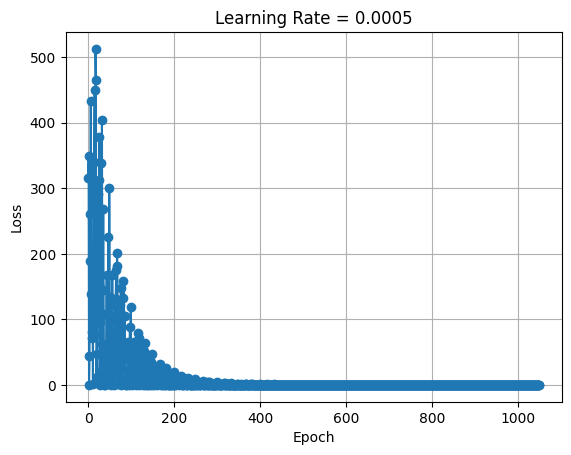

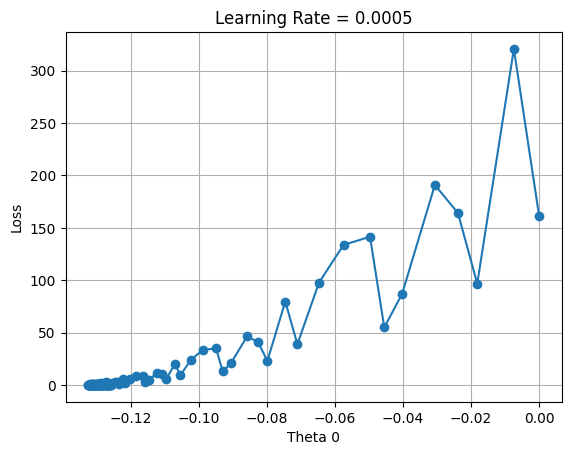

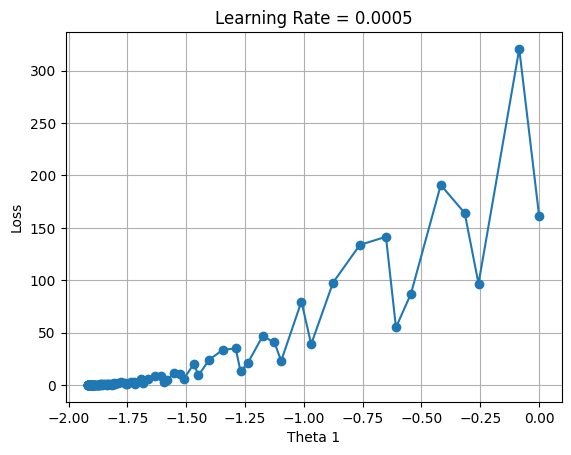

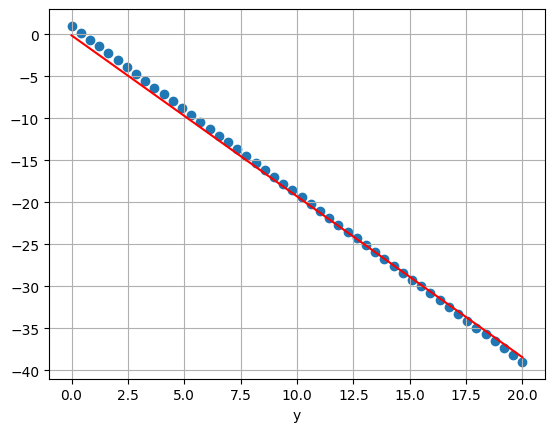

In [34]:
plot_loss_epoch(cost_st, alpha)
plot_theta_loss(thetas_0_list_mini, cost_mini, alpha, xlabel='Theta 0')
plot_theta_loss(thetas_1_list_mini, cost_mini, alpha, xlabel='Theta 1')
plot_best_line(X, y, theta_0_opt_mini + theta_1_opt_mini * X)

##### The following results uses batch size=10, alpha = 0.0005 and max. iterations = 300.

In [35]:
batch_size = 10
alpha = 0.0005
epochs = 300

thetas_0_list_mini, thetas_1_list_mini, cost_mini, hypothesis_mini, theta_0_opt_mini, theta_1_opt_mini = mini_batch_GD(X, y, alpha, batch_size, epochs)

****************** Epoch 0 ********************

Cost =  231.42995782739976

Gradient Vector:
 [[ 18.35821097]
 [304.25721957]]

Gradient Vector Norm:
 304.81056341595394

theta_0_new :  -0.041790747028237485
theta_0_new :  -0.5685447635319294

****************** Epoch 1 ********************

Cost =  115.53964663489248

Gradient Vector:
 [[ 12.88310744]
 [214.90915149]]

Gradient Vector Norm:
 215.29495546761527

theta_0_new :  -0.0709633785263962
theta_0_new :  -0.9683981855351803

****************** Epoch 2 ********************

Cost =  57.930034271913755

Gradient Vector:
 [[  9.03267851]
 [152.07321506]]

Gradient Vector Norm:
 152.34123545840177

theta_0_new :  -0.09126227524256586
theta_0_new :  -1.2496169440990215

****************** Epoch 3 ********************

Cost =  29.231832443604162

Gradient Vector:
 [[  6.32482574]
 [107.88232338]]

Gradient Vector Norm:
 108.06756737389507

theta_0_new :  -0.10532072761264161
theta_0_new :  -1.44740413021262

****************** Epoch 4

In [36]:
h_mini = theta_0_opt_mini + theta_1_opt_mini * X

print('r2_score:', r2_score(y, h_mini))

r2_score: 0.9976457329353516


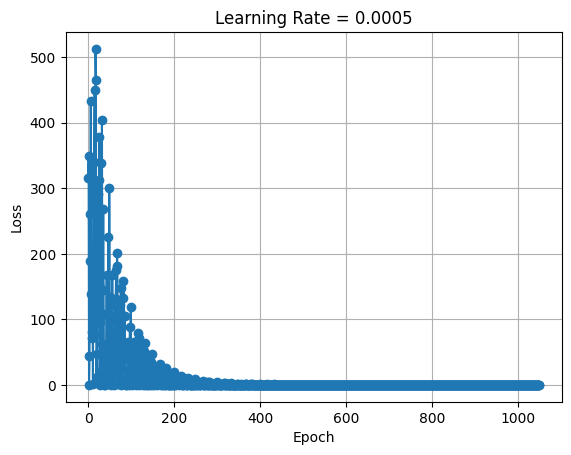

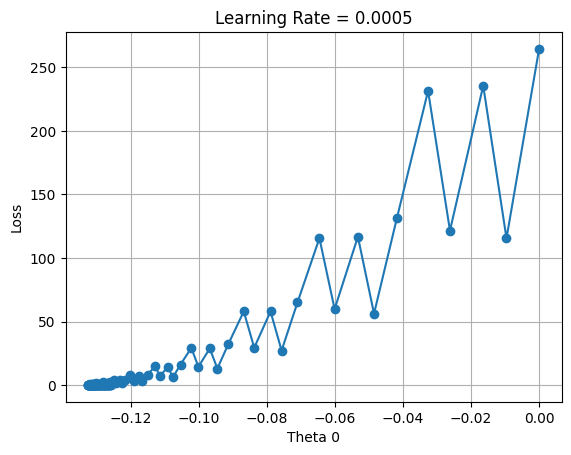

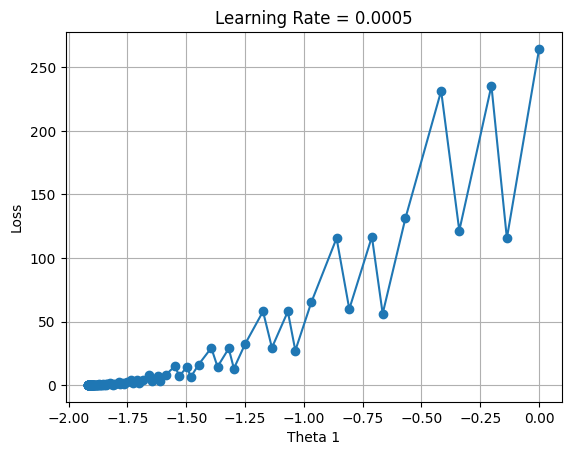

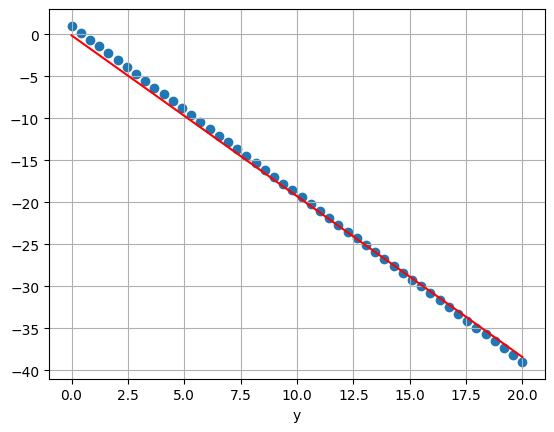

In [37]:

plot_loss_epoch(cost_st, alpha)
plot_theta_loss(thetas_0_list_mini, cost_mini, alpha, xlabel='Theta 0')
plot_theta_loss(thetas_1_list_mini, cost_mini, alpha, xlabel='Theta 1')
plot_best_line(X, y, theta_0_opt_mini + theta_1_opt_mini * X)

##### The following results uses batch size=20, alpha = 0.0005 and max. iterations = 300.

In [38]:
batch_size = 20
alpha = 0.0005
epochs = 300

thetas_0_list_mini, thetas_1_list_mini, cost_mini, hypothesis_mini, theta_0_opt_mini, theta_1_opt_mini = mini_batch_GD(X, y, alpha, batch_size, epochs)

****************** Epoch 0 ********************

Cost =  311.7877434168318

Gradient Vector:
 [[ 22.9277519 ]
 [341.85475484]]

Gradient Vector Norm:
 342.6227593299364

theta_0_new :  -0.01975979431826875
theta_0_new :  -0.27920746904619953

****************** Epoch 1 ********************

Cost =  227.8860540992905

Gradient Vector:
 [[ 19.57653647]
 [292.24650868]]

Gradient Vector Norm:
 292.9014554658343

theta_0_new :  -0.03660615797102368
theta_0_new :  -0.5177936355520775

****************** Epoch 2 ********************

Cost =  166.59395545023438

Gradient Vector:
 [[ 16.71291872]
 [249.85611762]]

Gradient Vector Norm:
 250.41445877999374

theta_0_new :  -0.05096299734299387
theta_0_new :  -0.7216688048153717

****************** Epoch 3 ********************

Cost =  121.81505627726185

Gradient Vector:
 [[ 14.2659543 ]
 [213.63340039]]

Gradient Vector Norm:
 214.10919460894706

theta_0_new :  -0.06319254141446068
theta_0_new :  -0.8958833463294811

****************** Epoch 4 

In [39]:
h_mini = theta_0_opt_mini + theta_1_opt_mini * X

print('r2_score:', r2_score(y, h_mini))

r2_score: 0.9976437729813179


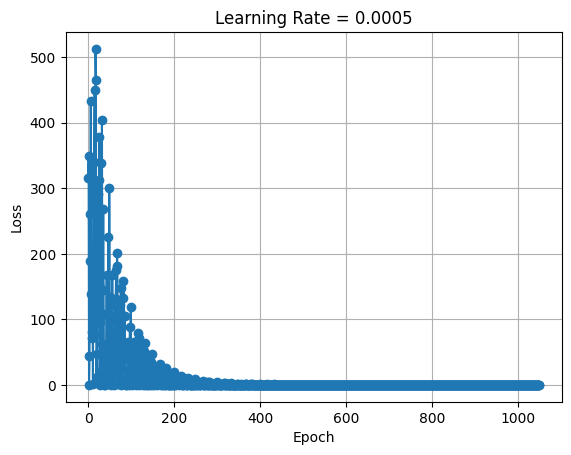

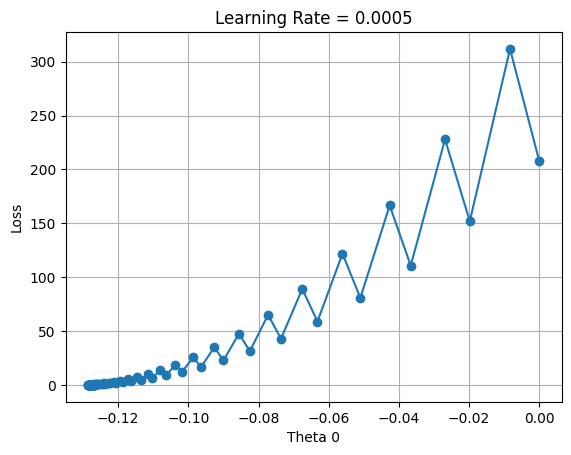

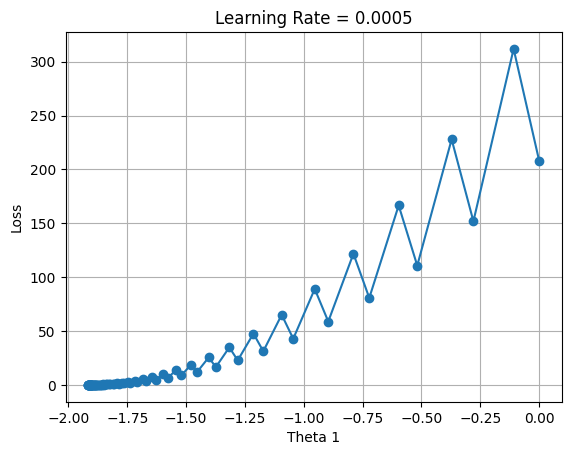

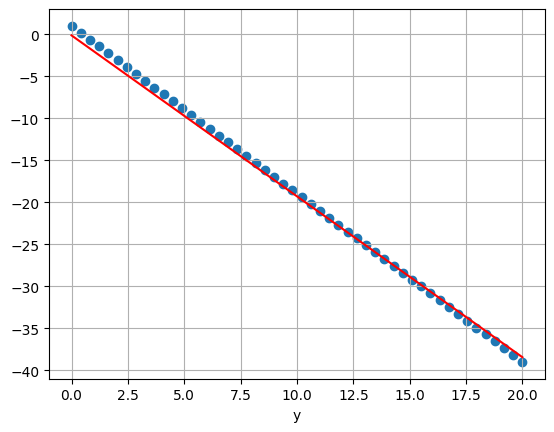

In [40]:
plot_loss_epoch(cost_st, alpha)
plot_theta_loss(thetas_0_list_mini, cost_mini, alpha, xlabel='Theta 0')
plot_theta_loss(thetas_1_list_mini, cost_mini, alpha, xlabel='Theta 1')
plot_best_line(X, y, theta_0_opt_mini + theta_1_opt_mini * X)